# 決定木モデルの作成

## 決定木モデルの概要

* 質問に対する分岐を階層的に作ることで、判別／回帰を行うモデル
* パラメータ調整を適切にしないと過学習しやすい
* このケースでは顧客が定額預金申し込みをするかしないかの __分類__ を予測し、評価尺度は __AUC__ （1が最も良い）を用いる

## 対象データ

ここではSIGNATEの[【練習問題】銀行の顧客ターゲティングデータ](https://signate.jp/competitions/1/data)を使用している

### train.csv（学習データ）

* 説明変数：目的変数以外の全て
* 目的変数：y（定額預金申し込み有無）

### test.csv（評価データ）

* 説明変数：全て


## データの準備

必要に応じてGraphvizをインストールしておく

In [ ]:
!pip install graphviz pydotplus

ライブラリのインポート

__DecisionTreeClassifier__ は決定木用のライブラリ

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

CSVデータの読み込み

In [35]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('submit_sample.csv', header=None)

学習データと評価データの先頭行を確認する

In [36]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


In [37]:
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
3,4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
4,5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown


## 説明変数と目的変数の設定

* 学習データの説明変数を抽出する
* 目的変数y以外のカラムを説明変数に設定する

説明変数に全ての行と、最初から17列目までを指定する

In [38]:
trainX = train.iloc[:, 0:17]

内容を確認する

In [39]:
trainX.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success


学習データの目的変数を抽出する

In [40]:
y = train['y']

評価データの説明変数を抽出する

全カラムを説明変数に設定する

In [41]:
testX = test.copy()

質的データをダミー変数化する

In [42]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

## モデルの準備

### モデルを表す変数を用意する

In [43]:
clf = DT(max_depth=2, min_samples_leaf=500)

## モデルの作成

### fit関数でモデルを作成する

説明変数、目的変数の順に指定

In [44]:
clf.fit(trainX, y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=500)

## 決定木を可視化する

決定木の図のデータをdotファイルで書き出す

In [45]:
export_graphviz(clf, out_file='tree.dot', feature_names=trainX.columns, class_names=['0', '1'], filled=True, rounded=True)

書き出したデータを表示する

In [46]:
g = pydotplus.graph_from_dot_file(path='tree.dot')

Windows環境で利用する場合の対応
* Graphvizをインストールしパスを通しておく
* dot.exeへのパスをdictで渡す（下記コード）

In [47]:
g.progs = {'dot': u'C:\\Program Files\\Graphviz\\bin\\dot.exe'}

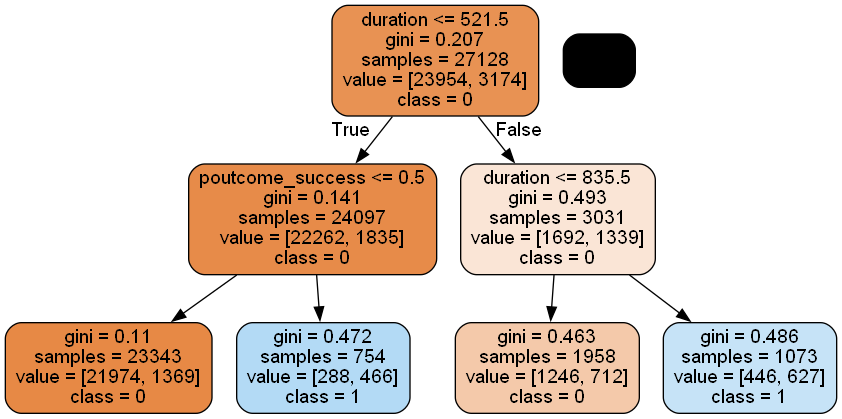

In [48]:
Image(g.create_png())

predict関数を使った予測結果を変数に代入する

In [49]:
pred = clf.predict_proba(testX)

変数を表示するとそれぞれの行に __[ 0である確率、1である確率 ]__ が含まれている事がわかる

In [50]:
pred

array([[0.41565704, 0.58434296],
       [0.41565704, 0.58434296],
       [0.94135287, 0.05864713],
       ...,
       [0.94135287, 0.05864713],
       [0.94135287, 0.05864713],
       [0.94135287, 0.05864713]])

予測するのは __定額預金を申し込む確率__ なので1である確率のみを抽出する

In [51]:
pred = pred[:,1]

In [52]:
pred

array([0.58434296, 0.58434296, 0.05864713, ..., 0.05864713, 0.05864713,
       0.05864713])

## モデルの評価

### SIGNATEで評価する形式にデータを加工する

sampleファイルのカラム[1]に、予測結果を代入する

In [53]:
sample.head()

,0,1
0,1,0.236
1,2,0.128
2,3,0.903
3,4,0.782
4,5,0.597


In [54]:
sample[1] = pred

In [55]:
sample.head()

,0,1
0,1,0.584343
1,2,0.584343
2,3,0.058647
3,4,0.058647
4,5,0.058647


sampleをCSVファイルに書き出す

In [56]:
sample.to_csv('submit1_bank.csv', index=None, header=None)

書き出したファイルを[SIGNATE](https://signate.jp/competitions/1/data)に投稿して評価を確認する